In [1]:
import pandas as pd

# Replace 'power.csv' with your actual file name if different
df = pd.read_csv('powerconsumption.csv')

# Show first 5 rows
print("✅ Dataset loaded. Shape:", df.shape)
df.head()


✅ Dataset loaded. Shape: (52416, 9)


,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [10]:
import pandas as pd

# Load your CSV
df = pd.read_csv('powerconsumption.csv')

df['Datetime'] = pd.to_datetime(df['Datetime'])
df.sort_values('Datetime', inplace=True)
df.dropna(inplace=True)
df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['dayofweek'] = df['Datetime'].dt.dayofweek

print("Columns in dataset:", df.columns)

df.rename(columns={df.columns[1]: 'power_consumption'}, inplace=True)

df['target'] = df['power_consumption'].shift(-1)

df.dropna(inplace=True)
df.head()

Columns in dataset: Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'year', 'month',
       'day', 'dayofweek'],
      dtype='object')


,Datetime,power_consumption,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,year,month,day,dayofweek,target
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017,1,1,6,6.414
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017,1,1,6,6.313
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017,1,1,6,6.121
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017,1,1,6,5.921
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017,1,1,6,5.853


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df[['power_consumption', 'year', 'month', 'day', 'dayofweek']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 RMSE: {rmse:.2f}")
print(f"📈 R² Score: {r2:.2f}")


📊 RMSE: 0.22
📈 R² Score: 1.00


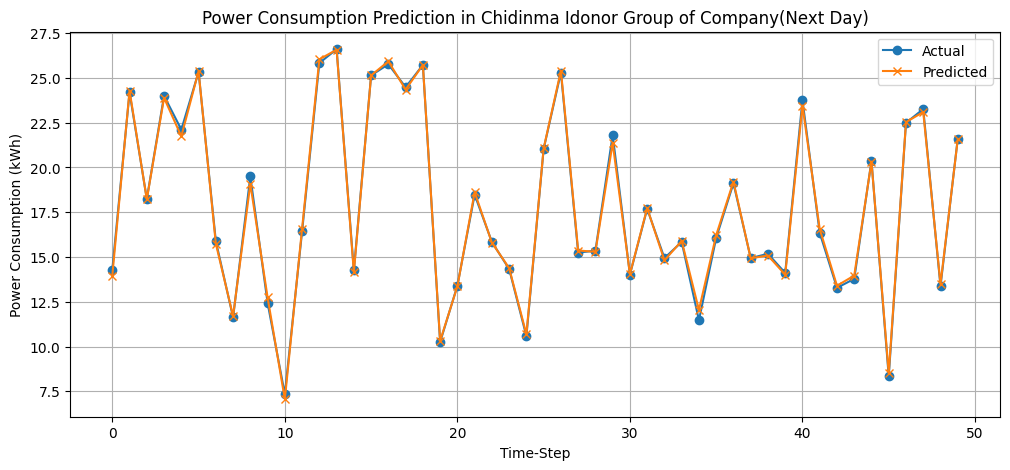

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.title("Power Consumption Prediction in Chidinma Idonor Group of Company(Next Day)")
plt.xlabel("Time-Step")
plt.ylabel("Power Consumption (kWh)")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import pandas as pd
import numpy as np

latest = df.iloc[-1]

next_input = pd.DataFrame({
    'power_consumption': [latest['power_consumption']],
    'year': [latest['year']],
    'month': [latest['month']],
    'day': [latest['day']],
    'dayofweek': [latest['dayofweek']]
})

prediction = model.predict(next_input)[0]
print(f"🔮 Predicted power consumption for the next day in Chidinma idonor Group of Company is: {prediction:.2f} kWh")


🔮 Predicted power consumption for the next day in Chidinma idonor Group of Company is: 6.77 kWh
